# What is the employee satisfaction rate? & what variables contribute to said satisfaction?

In [27]:
# Download/upload possible needed packages to analyze data

In [61]:
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")
#install.packages("tidyr")
#install.packages("mvnormtest")
#install.packages("plyr")
install.packages("ggplot2")
install.packages("lattice")


The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T//RtmpS0flFW/downloaded_packages


In [62]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")
#library("tidyr")
#library("mvnormtest")
#library("plyr")
library("ggplot2")
library("lattice")

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


Loading required package: lmerTest


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [63]:
EmployeeSatisfaction = read.csv("../Data/Employee-Satisfaction-Index.csv")

In [64]:
ES = read.csv("../Data/ES.csv")

In [45]:
#ES

In [65]:
EmployeeSatisfaction

X,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
5,PUR7265,40,Purchasing,Suburb,UG,Referral,3,3,0,7,1,42419,1
6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0
7,TECH5426,25,Technology,City,UG,Recruitment Agency,1,1,0,4,0,24076,0
8,HR6578,35,HR,City,PG,Referral,3,4,0,0,0,42419,1


In [32]:
# Keep only the variables neccessary for analyzing

In [66]:
keeps <- c("age", "Dept", "location", "job_level", "rating", "onsite", "salary", "satisfied")
EmployeeSatisfaction2 <- EmployeeSatisfaction[keeps]

In [67]:
EmployeeSatisfaction2

age,Dept,location,job_level,rating,onsite,salary,satisfied
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
28,HR,Suburb,5,2,0,86750,1
50,Technology,Suburb,3,5,1,42419,0
43,Technology,Suburb,4,1,0,65715,0
44,Sales,City,2,3,1,29805,1
33,HR,City,2,1,0,29805,1
40,Purchasing,Suburb,3,3,0,42419,1
26,Purchasing,Suburb,5,5,0,86750,0
25,Technology,City,1,1,0,24076,0
35,HR,City,3,4,0,42419,1


In [35]:
# Recode Dept & location columns

In [68]:
EmployeeSatisfaction2$DeptR <- NA

In [69]:
EmployeeSatisfaction2$DeptR[EmployeeSatisfaction2$Dept=='HR'] <- 0
EmployeeSatisfaction2$DeptR[EmployeeSatisfaction2$Dept=='Technology'] <- 1
EmployeeSatisfaction2$DeptR[EmployeeSatisfaction2$Dept=='Sales'] <- 2
EmployeeSatisfaction2$DeptR[EmployeeSatisfaction2$Dept=='Purchasing'] <- 3
EmployeeSatisfaction2$DeptR[EmployeeSatisfaction2$Dept=='Marketing'] <- 4

In [70]:
EmployeeSatisfaction2$locationR <- NA

In [71]:
EmployeeSatisfaction2$locationR[EmployeeSatisfaction2$location=='City'] <- 0
EmployeeSatisfaction2$locationR[EmployeeSatisfaction2$location=='Suburb'] <- 1

In [40]:
# Remove original Dept & location columns

In [72]:
keeps <- c("age", "job_level", "rating", "onsite", "salary", "satisfied", "DeptR", "locationR")
EmployeeSatisfaction3 <- EmployeeSatisfaction2[keeps]

In [73]:
EmployeeSatisfaction3

age,job_level,rating,onsite,salary,satisfied,DeptR,locationR
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
28,5,2,0,86750,1,0,1
50,3,5,1,42419,0,1,1
43,4,1,0,65715,0,1,1
44,2,3,1,29805,1,2,0
33,2,1,0,29805,1,0,0
40,3,3,0,42419,1,3,1
26,5,5,0,86750,0,3,1
25,1,1,0,24076,0,1,0
35,3,4,0,42419,1,0,0


In [74]:
ES

age,job_level,rating,onsite,salary,satisfied,DeptR,locationR
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
28,5,2,0,86750,1,0,0
50,3,5,1,42419,0,1,0
43,4,1,0,65715,0,1,0
44,2,3,1,29805,1,2,1
33,2,1,0,29805,1,0,1
40,3,3,0,42419,1,3,0
26,5,5,0,86750,0,3,0
25,1,1,0,24076,0,1,1
35,3,4,0,42419,1,0,1


In [77]:
# Does the employees age impact thir job satisfaction level?

In [78]:
# Testing for linearity

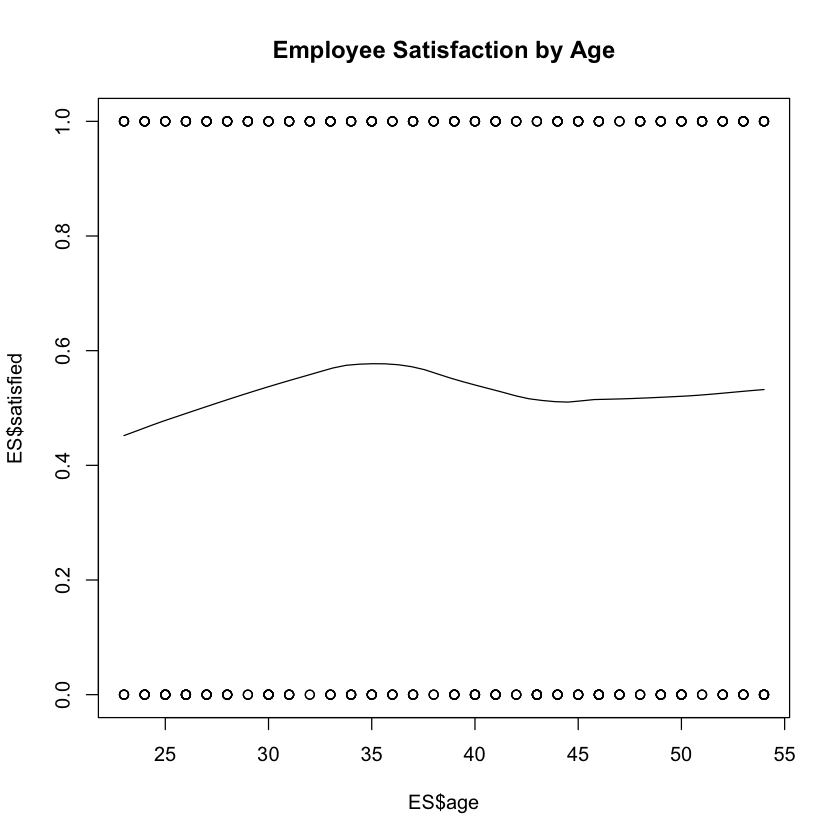

In [79]:
scatter.smooth(x=ES$age, y=ES$satisfied, main="Employee Satisfaction by Age")

In [80]:
# Looks to be pretty even in terms of satisfied & not satisfied employees

In [82]:
# Now to check for Homoscedascity we create a linear model first

In [83]:
lmMod <- lm(age~satisfied, data=ES)

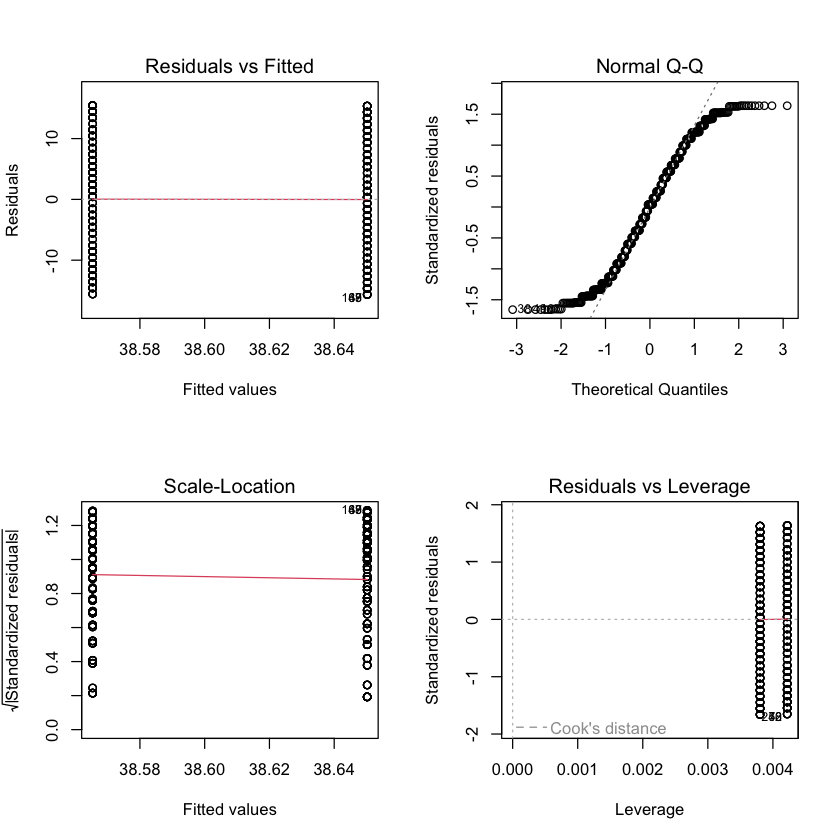

In [84]:
par(mfrow=c(2,2))
plot(lmMod)

In [85]:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 0.77098, df = 1, p-value = 0.3799


In [86]:
# No significance in satisfaction rates based on age, as the P-value is well over 0.05

In [87]:
car::ncvTest(lmMod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2954059, Df = 1, p = 0.58678

In [88]:
# Still not showing any significance

In [90]:
# Testing for Homogeneity of Variance with GVLMA Library for Assumptions

In [92]:
gvlma(lmMod)


Call:
lm(formula = age ~ satisfied, data = ES)

Coefficients:
(Intercept)    satisfied  
   38.56540      0.08479  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMod) 

                        Value   p-value                   Decision
Global Stat         3.175e+01 2.156e-06 Assumptions NOT satisfied!
Skewness            2.766e-03 9.581e-01    Assumptions acceptable.
Kurtosis            3.171e+01 1.792e-08 Assumptions NOT satisfied!
Link Function      -2.212e-12 1.000e+00    Assumptions acceptable.
Heteroscedasticity  3.560e-02 8.503e-01    Assumptions acceptable.

In [93]:
summary(lmMod)


Call:
lm(formula = age ~ satisfied, data = ES)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6502  -8.5654   0.3498   8.3498  15.4346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.56540    0.61372   62.84   <2e-16 ***
satisfied    0.08479    0.84620    0.10     0.92    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.448 on 498 degrees of freedom
Multiple R-squared:  2.016e-05,	Adjusted R-squared:  -0.001988 
F-statistic: 0.01004 on 1 and 498 DF,  p-value: 0.9202


In [94]:
# In conclusion; age does Not have a significant effect on employees satisfaction level.

In [95]:
# Now lets see if salary has an effect of satisfaction of employees

In [96]:
# Testing for Linearity

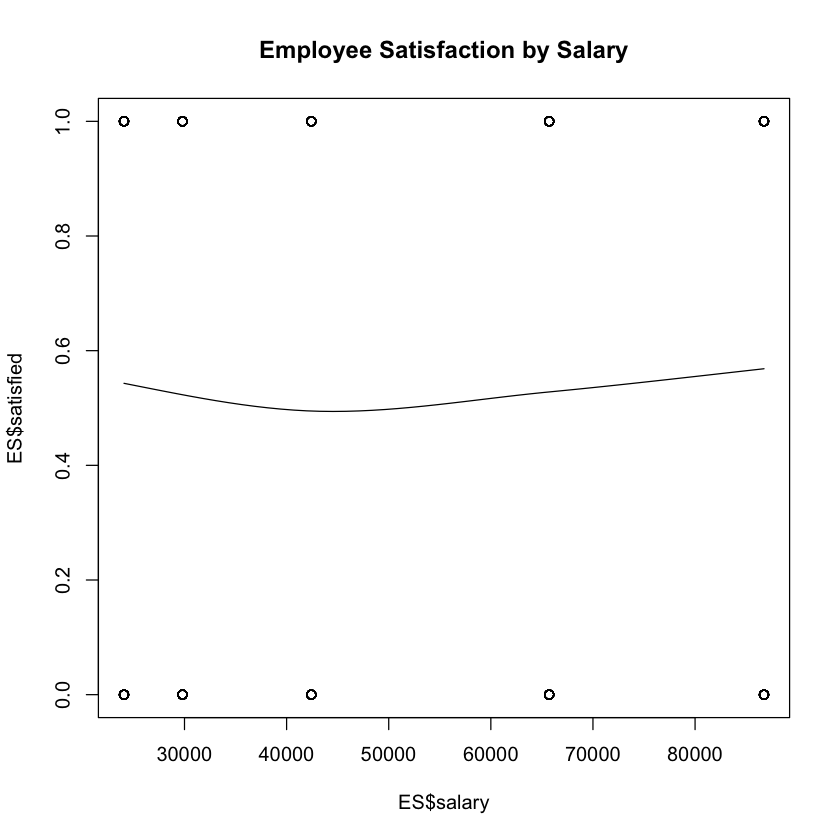

In [97]:
scatter.smooth(x=ES$salary, y=ES$satisfied, main="Employee Satisfaction by Salary")

In [98]:
# Check for Homoscedascity & create linear model

In [99]:
lmMod <- lm(salary~satisfied, data=ES)

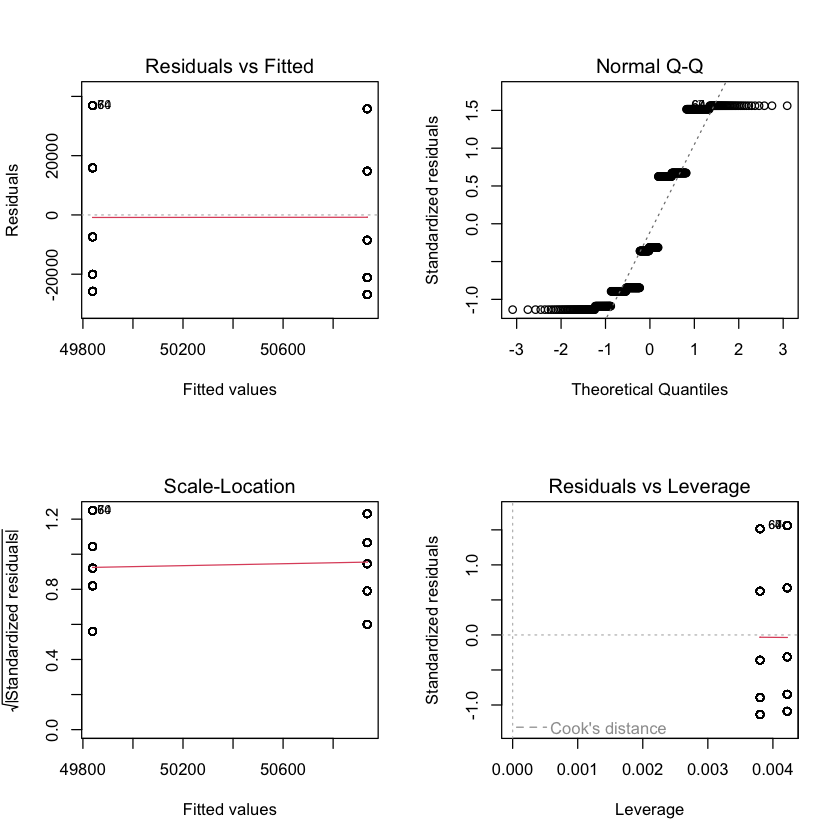

In [100]:
par(mfrow=c(2,2))
plot(lmMod)

In [101]:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 1.2514, df = 1, p-value = 0.2633


In [102]:
# So far not seeing any significance

In [103]:
car::ncvTest(lmMod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.3809723, Df = 1, p = 0.53708

In [104]:
# Again, no significance, even less with this test

In [105]:
# Testing for Homogeneity of Variance with GVLMA Library for Assumptions

In [106]:
gvlma(lmMod)


Call:
lm(formula = salary ~ satisfied, data = ES)

Coefficients:
(Intercept)    satisfied  
      49839         1097  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMod) 

                       Value   p-value                   Decision
Global Stat        5.308e+01 8.201e-11 Assumptions NOT satisfied!
Skewness           1.266e+01 3.731e-04 Assumptions NOT satisfied!
Kurtosis           4.032e+01 2.159e-10 Assumptions NOT satisfied!
Link Function      1.062e-11 1.000e+00    Assumptions acceptable.
Heteroscedasticity 9.994e-02 7.519e-01    Assumptions acceptable.

In [107]:
summary(lmMod)


Call:
lm(formula = salary ~ satisfied, data = ES)

Residuals:
   Min     1Q Median     3Q    Max 
-26860 -21131  -7420  15876  36911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    49839       1539  32.389   <2e-16 ***
satisfied       1097       2122   0.517    0.605    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23690 on 498 degrees of freedom
Multiple R-squared:  0.0005367,	Adjusted R-squared:  -0.00147 
F-statistic: 0.2674 on 1 and 498 DF,  p-value: 0.6053


In [108]:
# In conclusion; salary does Not have a significant effect on employees satisfaction level.